<a href="https://colab.research.google.com/github/Jeffresh/Datathon-2-Dphi-Heart-Disease-Prediction/blob/main/XAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

# Task 1

## Import Libraries

In [52]:
import shap
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression     

from sklearn.metrics import f1_score

## Load the data
Display the first 5 rows of the data after loading.

In [6]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB
              age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  212.000000  212.000000
mean    54.561321    0.688679    0.915094  ...    0.7

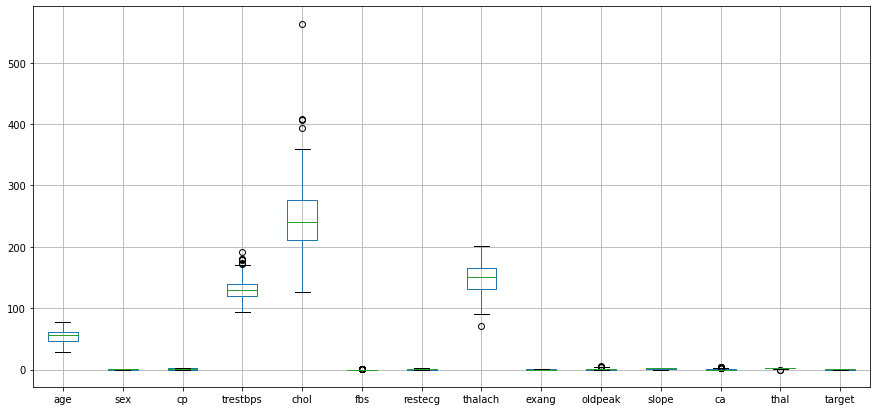

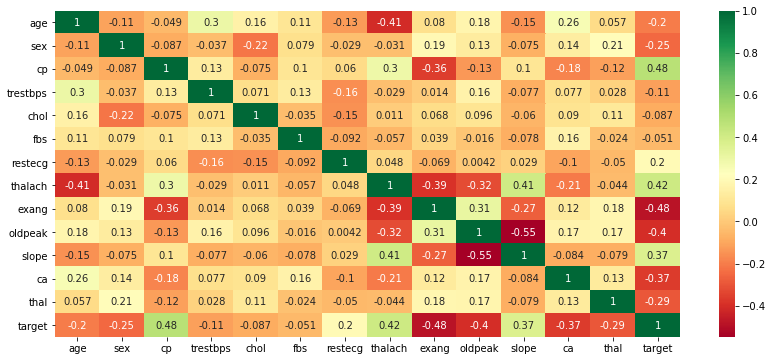

In [51]:
heart_data.info()
print(heart_data.describe())
boxplot = heart_data.boxplot(column=list(heart_data.columns), figsize=(15, 7))
print(heart_data.isnull().sum())
plt.figure(figsize=(14, 6))
sns.heatmap(heart_data.corr(), annot=True, cmap="RdYlGn")

## Separate the Input and Target Features of the data

In [137]:
X = heart_data.drop(columns='target')
y = heart_data.target

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y, shuffle=True)

## Scale your data if required

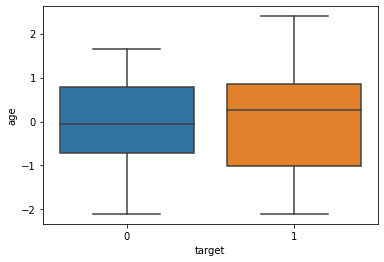

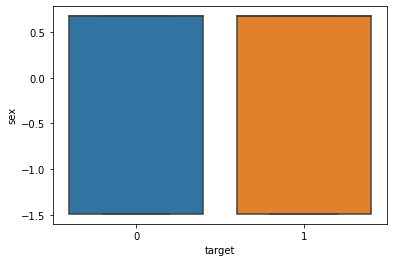

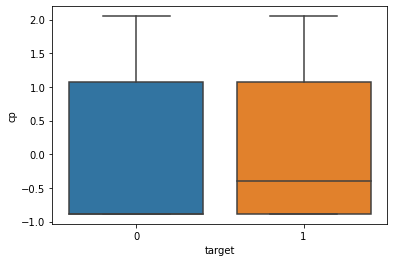

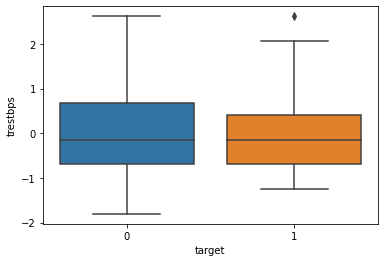

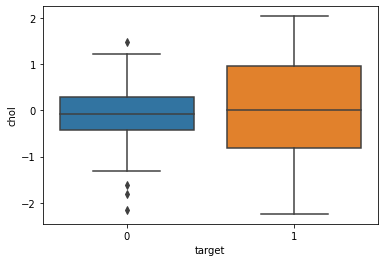

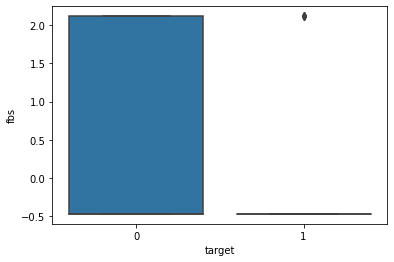

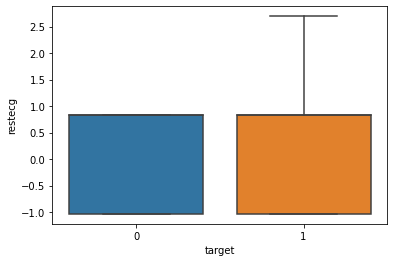

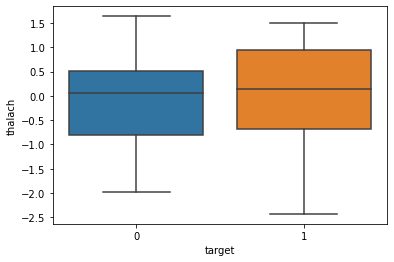

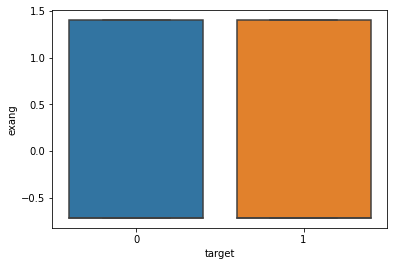

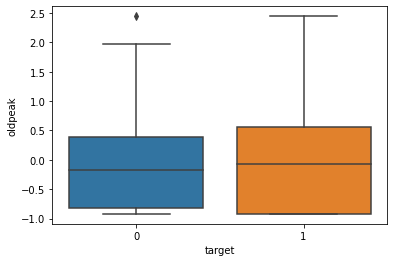

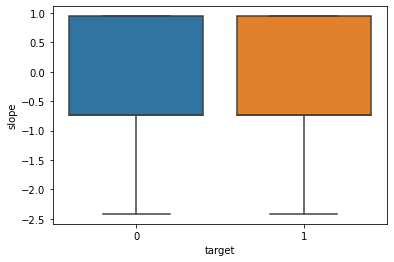

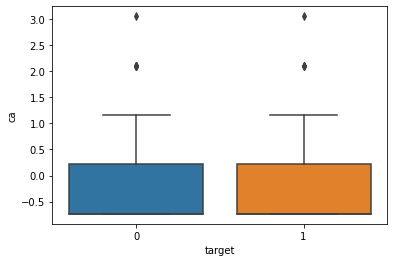

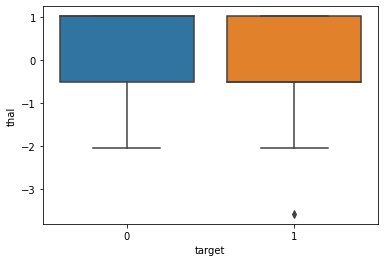

In [156]:
X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)
df_x = pd.DataFrame(data=X_train_s, columns=X.columns)

for feature in df_x.columns:
  sns.boxplot(x=y_train, y=feature, data=df_x)
  plt.show()

# Task 2

## Build a Logistic Regression Model on train set

In [158]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(X_train_s, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the model using F1 Score

In [162]:
f1_score(lg_model.predict(X_test_s), y_test)

0.8493150684931505

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [163]:
explainer = shap.LinearExplainer(lg_model, X_train_s)
shap_values = explainer.shap_values(X_test)

print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values, columns=df_x.columns).head()

Expected Value: -0.43666254117508396


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3.117941,-0.448293,-0.015850,-36.389130,44.985495,-0.016781,0.504859,9.075550,0.147444,-0.353824,0.768489,0.010665,-0.982863
1,2.792080,-0.448293,2.204586,-42.463619,35.111947,-0.016781,0.038323,19.800159,0.147444,-1.201603,0.768489,0.010665,-0.982863
2,2.978286,-0.448293,-0.015850,-36.389130,46.694378,-0.016781,0.038323,12.267398,-0.701330,-0.862491,0.090222,-0.859079,-0.982863
3,2.605873,0.109431,-0.015850,-40.641272,77.644153,-0.016781,0.038323,19.161789,-0.701330,-0.735324,0.768489,-1.728824,-1.507286
4,2.466218,-0.448293,-0.015850,-43.071068,42.896860,-0.016781,0.038323,14.182507,-0.701330,0.070066,1.446756,0.010665,-1.507286


## Write your inferences from the generated plot.

There are a lot of values away of the expected value. We can notice how the 
features affects to the result of the predictions for each example (row), because the values determines if it above or below the expected value,how affects the prediction, so studiying that values you can known how the features modify the prediction for 1 or 0 class.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [173]:
print(shap_values[0,:].sum())
print(y_test[0])
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test.iloc[0,:])

20.403703166623416
1


## Write your inferences from the generated plot.

You can see now clearly what features affects to the prediction in the first row, if the sum of the row is higher of 19.97, the prediction will be 0 in the other hand 1. So you can see how the more significative features in both ways, age, thalach, and chol tend to push the prediction 0, making the sum of the row higher, and the trestbps tend to push to to de prediction 1 (lower). The other features are quite irrelevant for the first row, of course.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [154]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_valuesq, X_test)

## Write your inferences from the generated plot.

The distribution is quite uniform so the probability of being for class 1 or 0 is very similar. Anyways you can see the that when the person has more probability of have a heart attack the 'chol' is when the 'chol' and 'talach' is higher, and in the other case in is the 'trestbps'.

# Task 6

## Plot a SHAP summary plot using all the features in the data

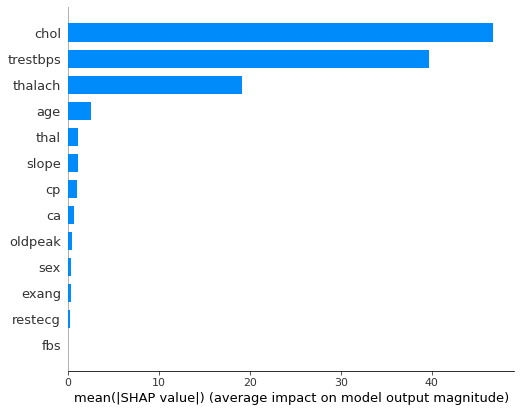

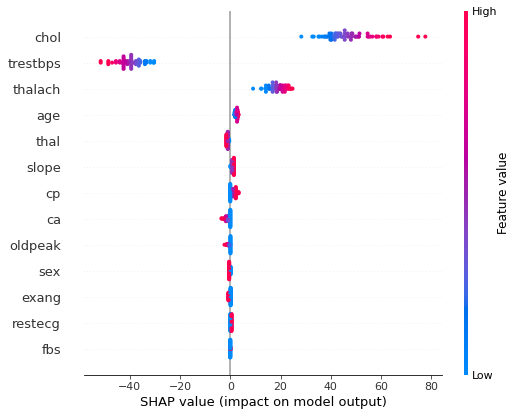

In [176]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar",class_names=df_x.columns)

shap.initjs()
shap.summary_plot(shap_values, X_test)

## Write your inferences from the generated plot.

We can see how the chool, trestbps and thatlach are the most important features and, tbs, restecg, exang, ca, cp, slope, thal and age are quite irrelevant in that order of importance.

In the second plot we can see also the distribution, the features that are less important has low dispersion and is centered, the other are skewed and as more dispersion, for that affect "positive" or "negative" to the prediction, impacting in the model output.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

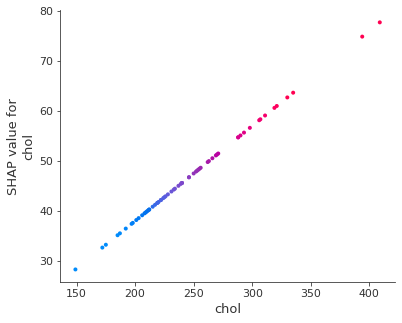

In [178]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test)

## Write your inferences from the generated plot.
How we see before, high chol push the model to predict heart attack. So if you have a high chol, you it's exist more probability to have a heart attack, our model "says", becasue higher is the 'chol' higher is his shap value effect.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 